In [32]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [33]:
df=pd.read_csv("file:///F:/healthcare-dataset-stroke-data%20(1).csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [34]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


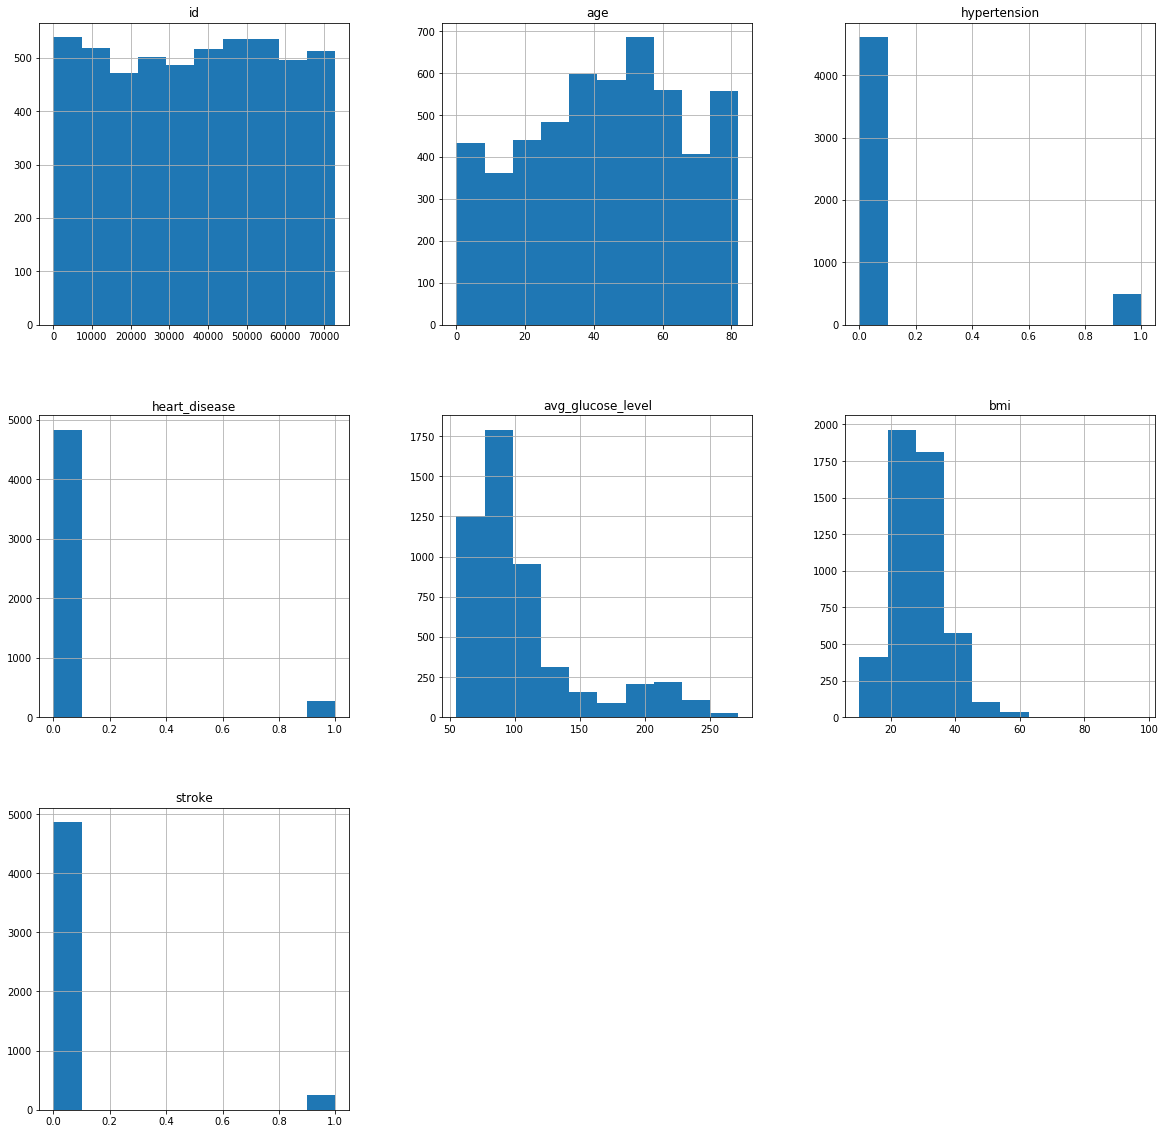

In [37]:
df.hist(figsize=(20,20))
plt.show()

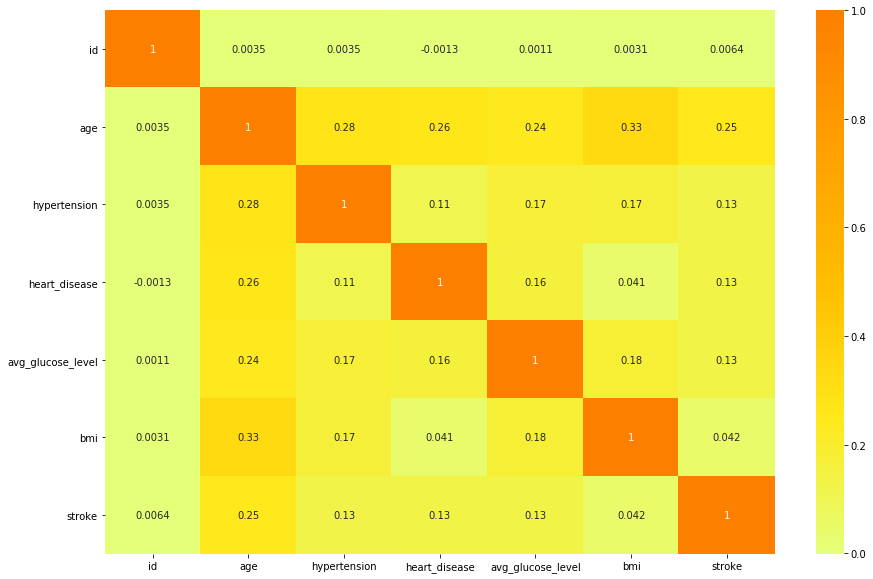

In [38]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Wistia')
plt.show()

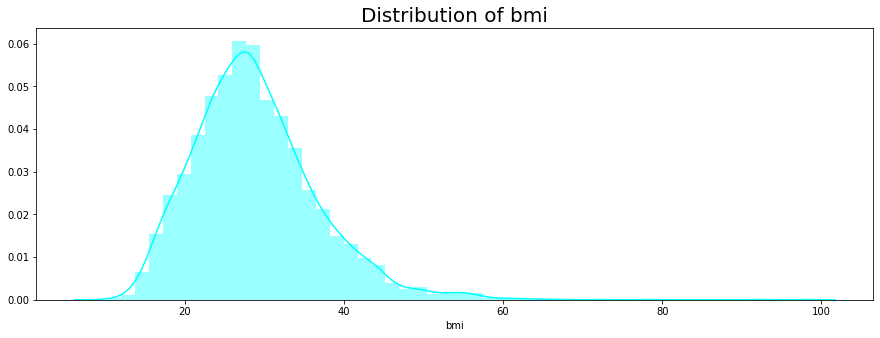

In [39]:
plt.subplots(figsize=(15,5))
sns.distplot(df['bmi'], color = 'cyan')
plt.title('Distribution of bmi', fontsize = 20)
plt.show()

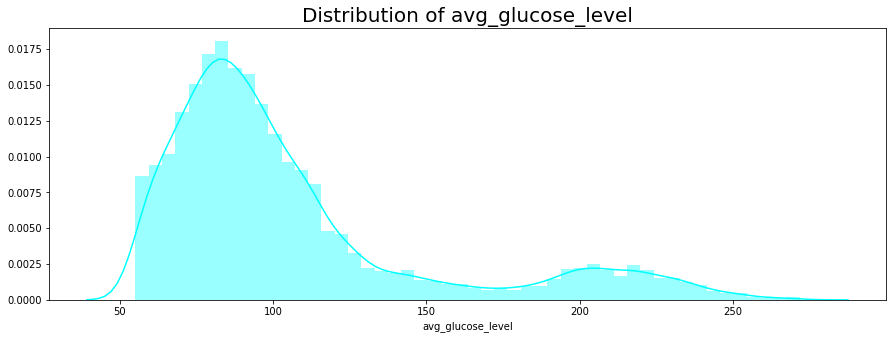

In [40]:
plt.subplots(figsize=(15,5))
sns.distplot(df['avg_glucose_level'], color = 'cyan')
plt.title('Distribution of avg_glucose_level', fontsize = 20)
plt.show()

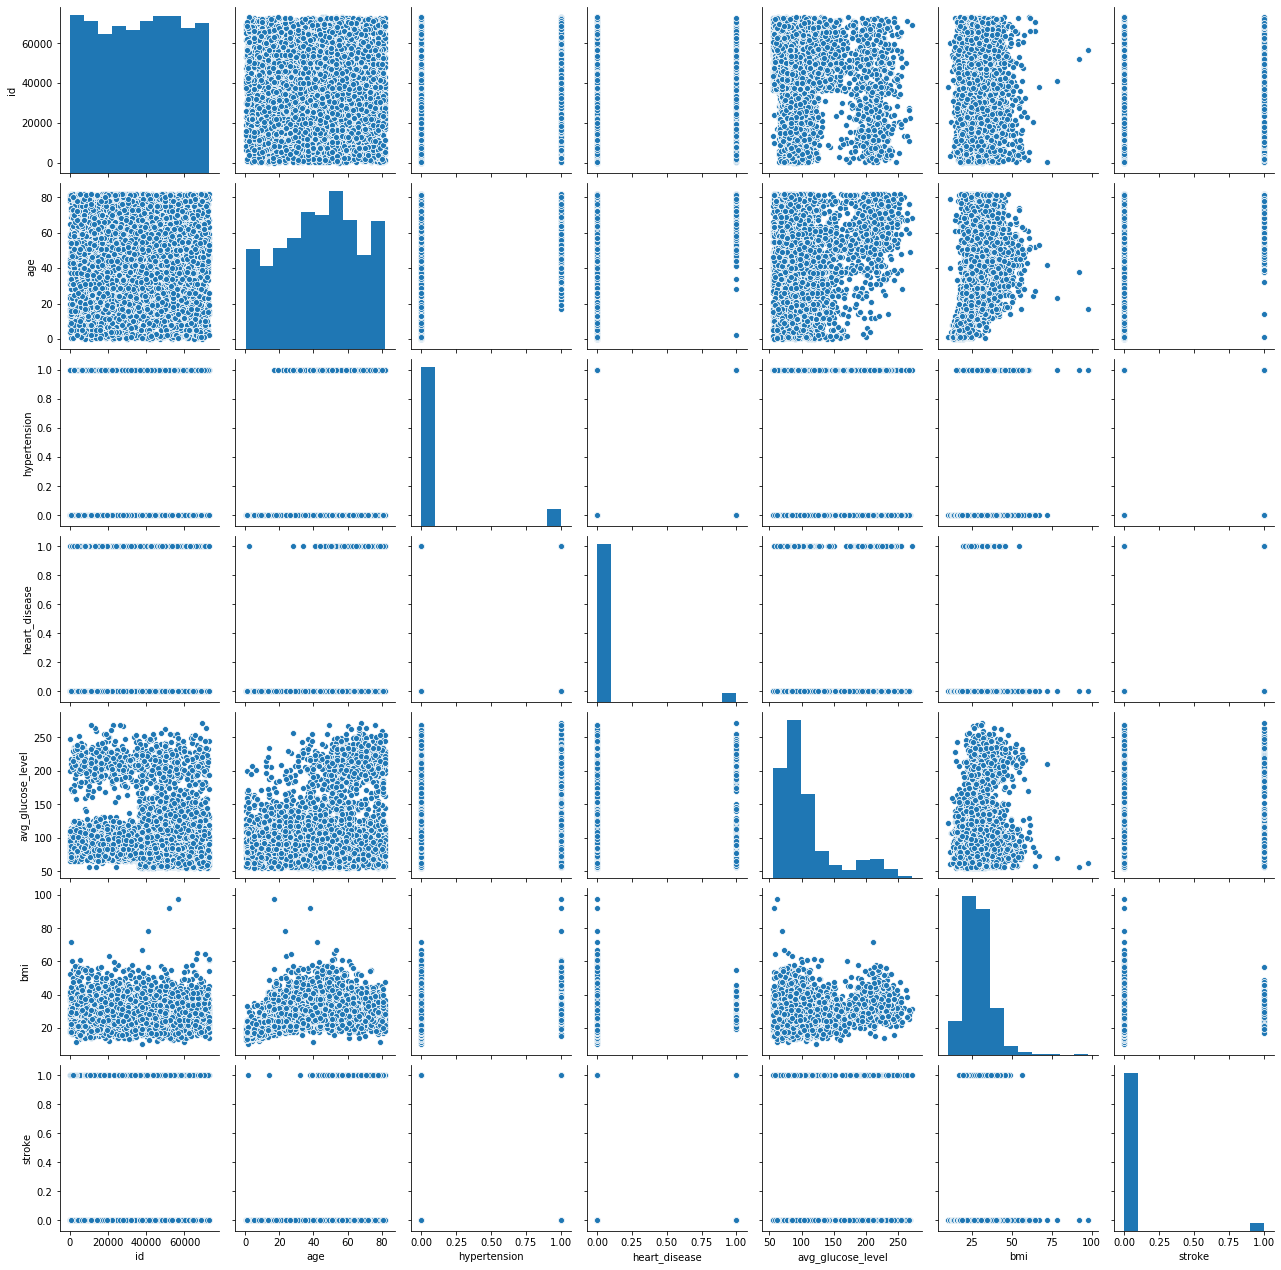

In [41]:
sns.pairplot(df)

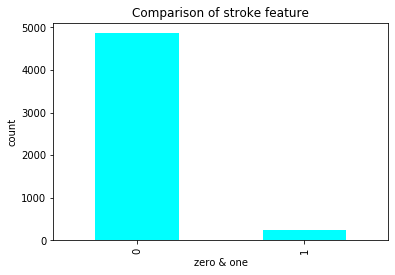

In [42]:
df['stroke'].value_counts(dropna = False).plot.bar(color = 'cyan')
plt.title('Comparison of stroke feature')
plt.xlabel('zero & one')
plt.ylabel('count')
plt.show()

In [43]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [44]:
df=df.fillna(0)

In [45]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

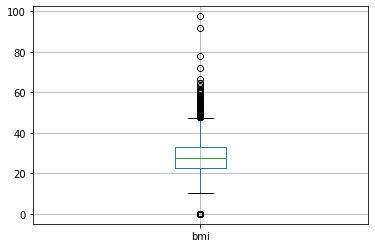

In [46]:
df.boxplot(column='bmi')

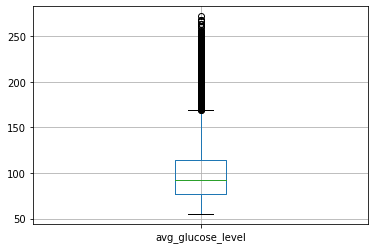

In [47]:
df.boxplot(column='avg_glucose_level')

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
la=LabelEncoder()

In [50]:
df_col=('gender','smoking_status','work_type','Residence_type','ever_married')

In [51]:
for i in df_col:
    df[i]=la.fit_transform(df[i])

In [52]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,0.0,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [53]:
df[['ever_married', 'Residence_type', 'smoking_status', 'gender', 'work_type']].head()

,ever_married,Residence_type,smoking_status,gender,work_type
0,1,1,1,1,2
1,1,0,2,0,3
2,1,0,2,1,2
3,1,1,3,0,2
4,1,0,2,0,3


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int32  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int32  
 6   work_type          5110 non-null   int32  
 7   Residence_type     5110 non-null   int32  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int32  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(4)
memory usage: 379.4 KB


In [55]:
df = df.drop('id', axis=1)

In [56]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,0.0,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [57]:
X = df.drop('stroke', axis=1)
y = df['stroke']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [63]:
lo=LogisticRegression()
lo.fit(X_train,y_train)
pre_lo=lo.predict(X_test)
accu_lo=accuracy_score(y_test,pre_lo)
accu_lo

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9497716894977168

In [64]:
print(classification_report(y_test,pre_lo))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.40      0.03      0.05        76

    accuracy                           0.95      1533
   macro avg       0.68      0.51      0.51      1533
weighted avg       0.92      0.95      0.93      1533



In [65]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rnd=RandomForestClassifier()
rnd.fit(X_train,y_train)
pre_rnd=rnd.predict(X_test)
accu_rnd=accuracy_score(y_test,pre_rnd)
accu_rnd

0.9497716894977168

In [68]:
print(classification_report(y_test,pre_rnd))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.40      0.03      0.05        76

    accuracy                           0.95      1533
   macro avg       0.68      0.51      0.51      1533
weighted avg       0.92      0.95      0.93      1533



In [69]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,0.0,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [70]:
import sweetviz as sv

In [71]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [72]:
from IPython.display import IFrame

In [73]:
IFrame(src='Analyze.html',width=1000,height=600)

In [74]:
from dataprep.eda import *

In [77]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [83]:
import optuna

In [85]:
from sklearn.model_selection import cross_val_score, train_test_split

In [86]:
def objective(trial):
    classifier_name = trial.suggest_categorical("classifier", ["DecisionTree"])
    c_criterion = trial.suggest_categorical("criterion", ["gini","entropy"])
    c_splitter = trial.suggest_categorical("splitter", ["best","random"])
    c_max_depth = trial.suggest_int("max_depth", 2, 32, log=True)
    c_min_samples_split = trial.suggest_int("min_samples_split", 2, 20, log=True)
    classifier_obj = DecisionTreeClassifier(criterion=c_criterion, splitter=c_splitter,
        max_depth=c_max_depth, min_samples_split = c_min_samples_split, random_state=0)

    score = cross_val_score(classifier_obj, X, y, n_jobs=-1, cv=10)
    accuracy = score.mean()
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)
    print(study.best_trial)

[I 2021-05-15 20:01:49,999] A new study created in memory with name: no-name-a25b4d0f-88bf-429b-902d-f37e124b1c6d
[I 2021-05-15 20:02:09,505] Trial 0 finished with value: 0.928962818003914 and parameters: {'classifier': 'DecisionTree', 'criterion': 'gini', 'splitter': 'best', 'max_depth': 10, 'min_samples_split': 5}. Best is trial 0 with value: 0.928962818003914.
[I 2021-05-15 20:02:09,867] Trial 1 finished with value: 0.9495107632093932 and parameters: {'classifier': 'DecisionTree', 'criterion': 'entropy', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 3}. Best is trial 1 with value: 0.9495107632093932.
[I 2021-05-15 20:02:09,949] Trial 2 finished with value: 0.941682974559687 and parameters: {'classifier': 'DecisionTree', 'criterion': 'entropy', 'splitter': 'random', 'max_depth': 15, 'min_samples_split': 15}. Best is trial 1 with value: 0.9495107632093932.
[I 2021-05-15 20:02:10,026] Trial 3 finished with value: 0.9512720156555773 and parameters: {'classifier': 'DecisionTre

[I 2021-05-15 20:02:12,229] Trial 30 finished with value: 0.9512720156555773 and parameters: {'classifier': 'DecisionTree', 'criterion': 'gini', 'splitter': 'random', 'max_depth': 2, 'min_samples_split': 2}. Best is trial 3 with value: 0.9512720156555773.
[I 2021-05-15 20:02:12,315] Trial 31 finished with value: 0.9512720156555773 and parameters: {'classifier': 'DecisionTree', 'criterion': 'gini', 'splitter': 'best', 'max_depth': 2, 'min_samples_split': 2}. Best is trial 3 with value: 0.9512720156555773.
[I 2021-05-15 20:02:12,387] Trial 32 finished with value: 0.9512720156555773 and parameters: {'classifier': 'DecisionTree', 'criterion': 'gini', 'splitter': 'best', 'max_depth': 2, 'min_samples_split': 4}. Best is trial 3 with value: 0.9512720156555773.
[I 2021-05-15 20:02:12,457] Trial 33 finished with value: 0.9512720156555773 and parameters: {'classifier': 'DecisionTree', 'criterion': 'gini', 'splitter': 'random', 'max_depth': 2, 'min_samples_split': 2}. Best is trial 3 with value: 

FloatingPointError: underflow encountered in exp

In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
man=MinMaxScaler()
feat=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke']
df[feat]=man.fit_transform(df[feat])
df[feat]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.5,0.816895,0.0,1.0,1.0,0.50,1.0,0.801265,0.375000,0.333333,1.0
1,0.0,0.743652,0.0,0.0,1.0,0.75,0.0,0.679023,0.000000,0.666667,1.0
2,0.5,0.975586,0.0,1.0,1.0,0.50,0.0,0.234512,0.332992,0.666667,1.0
3,0.0,0.597168,0.0,0.0,1.0,0.50,1.0,0.536008,0.352459,1.000000,1.0
4,0.0,0.963379,1.0,0.0,1.0,0.75,0.0,0.549349,0.245902,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5105,0.0,0.975586,1.0,0.0,1.0,0.50,1.0,0.132167,0.000000,0.666667,0.0
5106,0.0,0.987793,0.0,0.0,1.0,0.75,1.0,0.323516,0.409836,0.666667,0.0
5107,0.0,0.426270,0.0,0.0,1.0,0.75,0.0,0.128658,0.313525,0.666667,0.0
5108,0.5,0.621582,0.0,0.0,1.0,0.50,0.0,0.513203,0.262295,0.333333,0.0


In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
std=StandardScaler()
feat=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke']
df[feat]=std.fit_transform(df[feat])
df[feat]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.188073,1.051434,-0.328602,4.185032,0.723884,-0.153836,0.984080,2.706375,0.928080,-0.351781,4.418381
1,-0.840344,0.786070,-0.328602,-0.238947,0.723884,0.763438,-1.016178,2.121559,-2.913002,0.581552,4.418381
2,1.188073,1.626390,-0.328602,4.185032,0.723884,-0.153836,-1.016178,-0.005028,0.497795,0.581552,4.418381
3,-0.840344,0.255342,-0.328602,-0.238947,0.723884,-0.153836,0.984080,1.437358,0.697195,1.514885,4.418381
4,-0.840344,1.582163,3.043196,-0.238947,0.723884,0.763438,-1.016178,1.501184,-0.394260,0.581552,4.418381
...,...,...,...,...,...,...,...,...,...,...,...
5105,-0.840344,1.626390,3.043196,-0.238947,0.723884,-0.153836,0.984080,-0.494658,-2.913002,0.581552,-0.226327
5106,-0.840344,1.670617,-0.328602,-0.238947,0.723884,0.763438,0.984080,0.420775,1.284902,0.581552,-0.226327
5107,-0.840344,-0.363842,-0.328602,-0.238947,0.723884,0.763438,-1.016178,-0.511443,0.298394,0.581552,-0.226327
5108,1.188073,0.343796,-0.328602,-0.238947,0.723884,-0.153836,-1.016178,1.328257,-0.226344,-0.351781,-0.226327
